## Back-testing of several investment strategies 



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
def strategies(df, days, ema1=26, ema2=52, SMA=False, EMA=False, MACD=False):
    
   
    if SMA==True:
        df['SMA'+str(days)] = df['Adj Close'].rolling(window = days).mean()
    
    #Exponential Moving Average: 
    
    if EMA==True:
        
        df['EMA'+str(days)] = df['Adj Close'].ewm(span = days).mean()
        
    #Moving Average Convergence/Divergence
    
    if MACD== True:
        
        df['MACD'+str(ema1)] = df['Adj Close'].ewm(span = ema1).mean()
        df['MACD'+str(ema2)] = df['Adj Close'].ewm(span = ema2).mean()
    
    return df

In [4]:
def position(df, days, ema1=26, ema2=52, SMA=False, EMA=False, MACD=False):
    
    #Compute the position of the day for each strategies
    
    df_pos = pd.DataFrame(index=df.index)
    
    if SMA == True:
        df_pos['Position_SMA'] = ['Long' if (df.loc[i,'Adj Close'] > df.loc[i, 'SMA'+str(days)]) else 'Short' for i in df.index] 
     
    if EMA == True:
        df_pos['Position_EMA'] = ['Long' if (df.loc[i,'Adj Close'] > df.loc[i, 'EMA'+str(days)]) else 'Short' for i in df.index]
   
    if MACD == True:
        df_pos['Position_MACD'] = ['Long' if (df.loc[i,'MACD'+str(ema1)] > df.loc[i, 'MACD'+str(ema2)]) else 'Short' for i in df.index]
        
    return df_pos

In [ ]:
def strategy_price(df, df_pos, LongOnly=False, LongShort=False, SMA=False, EMA=False, MACD=False):
    
    #Compute the P&L of the strategies
    
    df_strat_price = pd.DataFrame(index=df_pos.index)
    df_strat_price['Asset Price'] = df['Adj Close']
    
    #Case 1 : strategy = Long Only
    if LongOnly == True:
        if SMA == True:
            
            df_strat_price['LongOnly_SMA'] = [0]*df.shape[0]
            
            df_strat_price['LongOnly_SMA'].iloc[0] = df['Adj Close'].iloc[0] #1 day lag to compute the P&L of the strat
            df_strat_price['LongOnly_SMA'].iloc[1] = df['Adj Close'].iloc[0] #1 more day to compare easier with apple stcok price mouvement
            
           
            for i in range(0, df_pos.shape[0]-2):
               
                if df_pos['Position_SMA'].iloc[i] == 'Long':
                    
                    df_strat_price['LongOnly_SMA'].iloc[i+2] = (df_strat_price['LongOnly_SMA'].iloc[i+1]*(1+df['Return'].iloc[i+2]))
                else:
                     
                    df_strat_price['LongOnly_SMA'].iloc[i+2] = (df_strat_price['LongOnly_SMA'].iloc[i+1])
                
            
        if EMA == True:
            
            df_strat_price['LongOnly_EMA'] = [0]*df.shape[0]
            
            df_strat_price['LongOnly_EMA'].iloc[0] = df['Adj Close'].iloc[0] #1 day lag to compute the P&L of the strat
            df_strat_price['LongOnly_EMA'].iloc[1] = df['Adj Close'].iloc[0] #1 more day to compare easier with apple stcok price mouvement
            
            for i in range(0, df_pos.shape[0]-2):
                
                if df_pos['Position_EMA'].iloc[i] == 'Long':
                  
                    df_strat_price['LongOnly_EMA'].iloc[i+2] = (df_strat_price['LongOnly_EMA'].iloc[i+1]*(1+df['Return'].iloc[i+2]))
                else:
                     
                    df_strat_price['LongOnly_EMA'].iloc[i+2] = (df_strat_price['LongOnly_EMA'].iloc[i+1])

            
        if MACD == True:
            
            df_strat_price['LongOnly_MACD'] = [0]*df.shape[0]
            df_strat_price['LongOnly_MACD'].iloc[0] = df['Adj Close'].iloc[0] #1 day lag to compute the P&L of the strat
            df_strat_price['LongOnly_MACD'].iloc[1] = df['Adj Close'].iloc[0] #1 more day to compare easier with apple stcok price mouvement
            
            for i in range(0, df_pos.shape[0]-2):
                
                if df_pos['Position_MACD'].iloc[i] == 'Long':
                     
                    df_strat_price['LongOnly_MACD'].iloc[i+2] = (df_strat_price['LongOnly_MACD'].iloc[i+1]*(1+df['Return'].iloc[i+2]))
                else:
                    
                    df_strat_price['LongOnly_MACD'].iloc[i+2] = (df_strat_price['LongOnly_MACD'].iloc[i+1])
            
                        
    #Case 2 : strategy = Long and Short
    if LongShort == True:
        
        if SMA == True:
           
            df_strat_price['LongShort_SMA'] = [0]*df.shape[0]
            df_strat_price['LongShort_SMA'].iloc[0] = df['Adj Close'].iloc[0] #1 day lag to compute the P&L of the strat
            df_strat_price['LongShort_SMA'].iloc[1] = df['Adj Close'].iloc[0] #1 more day to compare easier with apple stcok price mouvement
            
            for i in range(0, df_pos.shape[0]-2):
                
                if df_pos['Position_SMA'].iloc[i] == 'Long':
                    df_strat_price['LongShort_SMA'].iloc[i+2] = (df_strat_price['LongShort_SMA'].iloc[i+1]*(1+df['Return'].iloc[i+2]))
                else:
                    df_strat_price['LongShort_SMA'].iloc[i+2] = (df_strat_price['LongShort_SMA'].iloc[i+1]/(1+df['Return'].iloc[i+2]))
            
        
        if EMA == True:
            
            df_strat_price['LongShort_EMA'] = [0]*df.shape[0]
            df_strat_price['LongShort_EMA'].iloc[0] = df['Adj Close'].iloc[0] #1 day lag to compute the P&L of the strat
            df_strat_price['LongShort_EMA'].iloc[1] = df['Adj Close'].iloc[0] #1 more day to compare easier with apple stock price mouvement
            
            for i in range(0, df_pos.shape[0]-2):
                
                if df_pos['Position_EMA'].iloc[i] == 'Long':
                    df_strat_price['LongShort_EMA'].iloc[i+2] = (df_strat_price['LongShort_EMA'].iloc[i+1]*(1+df['Return'].iloc[i+2]))
                else:
                    df_strat_price['LongShort_EMA'].iloc[i+2] = (df_strat_price['LongShort_EMA'].iloc[i+1]/(1+df['Return'].iloc[i+2]))
            
            
        if MACD == True:
            
            df_strat_price['LongShort_MACD'] = [0]*df.shape[0]
            df_strat_price['LongShort_MACD'].iloc[0] = df['Adj Close'].iloc[0] #1 day lag to compute the P&L of the strat
            df_strat_price['LongShort_MACD'].iloc[1] = df['Adj Close'].iloc[0] #1 more day to compare easier with apple stcok price mouvement
            
            for i in range(0, df_pos.shape[0]-2):
                
                if df_pos['Position_MACD'].iloc[i] == 'Long':
                    df_strat_price['LongShort_MACD'].iloc[i+2] = (df_strat_price['LongShort_MACD'].iloc[i+1]*(1+df['Return'].iloc[i+2]))
                else:
                    df_strat_price['LongShort_MACD'].iloc[i+2] = (df_strat_price['LongShort_MACD'].iloc[i+1]/(1+df['Return'].iloc[i+2]))

    
    return df_strat_price

In [7]:
def strategy_returns(df, df_strat_price):
    
    #Compute the return of each strategy
    
    df_strategy_returns = pd.DataFrame(index = df_strat_price.index)
   
    for series in df_strat_price.columns:
       
        df_strategy_returns[series] = (df_strat_price[series] - df_strat_price[series].shift()) / (df_strat_price[series].shift())
        
    return df_strategy_returns

In [6]:
def annualize_returns(r, periods):
    
    return ((1+r).prod())**(periods/r.shape[0])-1

In [5]:
def annualize_vol(r, periods):
    
    return r.std()*(periods**0.5)

In [ ]:
def sharpe_ratio(r, periods):
    ann_ret = annualize_returns(r, periods)
    ann_vol = annualize_vol(r, periods)
    return ann_ret/ann_vol

In [ ]:
def var_historic(r, level=5):
    
    return -np.percentile(r, level)

In [ ]:
def drawdown(r):
   
    wealth_index = 100*(1+r).cumprod()
    previous_peaks = wealth_index.cummax()
    drawdowns = (wealth_index - previous_peaks)/previous_peaks
    return drawdowns.min()

In [ ]:
def cvar_historic(r, level=5):
    is_beyond = (r <= -var_historic(r, level=level))
    return -r[is_beyond].mean()

In [ ]:
def compute_statistic(r, p=252):

    #Create a dataframe with some statistics about our strategies
    #example : annualized return, annualized vol, Value at Risk...
    
    ann_r = r.aggregate(annualize_returns, periods=p)
    ann_vol = r.aggregate(annualize_vol, periods=p)
    ann_sr = r.aggregate(sharpe_ratio, periods=p)
    dd = r.aggregate(drawdown)
    cf_var5 = r.aggregate(var_historic)
    hist_cvar5 = r.aggregate(cvar_historic)
    return pd.DataFrame({
        "Annualized Return": ann_r,
        "Annualized Vol": ann_vol,
        "Historical VaR (5%)": cf_var5,
        "Historical CVaR (5%)": hist_cvar5,
        "Sharpe Ratio": ann_sr,
        "Max Drawdown": dd
    })

In [9]:
def strategy_main(asset, days,ema1=26, ema2=52, SMA=False, EMA=False, MACD=False, LongOnly=False, LongShort=False):
    
    #Read the historal date from csv
    df = pd.read_csv(str(asset)+".csv")
    df = df.set_index('Date')
    
    #Create a new column with the returns based on Adjusted Close price
    df['Return'] = (df['Adj Close'] - df['Adj Close'].shift()) / df['Adj Close'].shift()
    df = df[['Adj Close','Return']]
    
    #Compute the Moving Averages
    df = strategies(df, days=100, ema1=ema1, ema2=ema2, SMA=SMA, EMA=EMA, MACD=MACD)
    
    #Delete NaN from the computation of Moving Averages
    df.dropna(inplace=True) 
    
    #Determine the day to day position of each strategy
    df_pos = position(df, days=100, ema1=ema1, ema2=ema2, SMA=SMA, EMA=EMA, MACD=MACD)
    
    #Compute the price of each strategy
    df_strat_price = strategy_price(df, df_pos, LongOnly=LongOnly, LongShort=LongShort, SMA=SMA, EMA=EMA, MACD=MACD)
    
    #Delete the 2 last columns of the dataframe because NaN
    df_strat_price = df_strat_price.drop(df_strat_price.tail(2).index) 
    
    #Compute the return of each strategy
    df_strategy_returns = strategy_returns(df, df_strat_price)
    df_strategy_returns.dropna(inplace=True)
    
    #Compute some statistics about each strategy
    df_stats = compute_statistic(df_strategy_returns)
    
    return df, df_pos, df_strat_price, df_strategy_returns, df_stats

In [8]:
def plot_strategy(asset, df_strat_price):

    #Plot all of our strategies in 1 graph in order to compare the strategies
    
    fig = plt.figure(figsize=(20,10))
    ax1 = plt.plot(df_strat_price)
    ax1 = plt.title("Investment strategies for " + asset, fontsize=22)
    ax1 = plt.xlabel("Date", fontsize=18)
    ax1 = plt.ylabel("Price", fontsize=18)
    ax1 = plt.legend(list(df_strat_price.columns),prop={"size":18}, loc="upper left")
    
    plt.show()

## We have implemented 3 mains trend following strategies

- Sample Moving Average crossover (SMA)
- Exponential Moving Average crossover (EMA)
- Moving Average Convergence-Divergence (MACD)

**First, you need to select which type of strategies you want to back-test**   

*For example*   
If you want to back-test SMA and EMA, enter : 1,1,0   
If you want to back-test SMA and MACD, enter : 1,0,1   

In [ ]:
input_strategies = str(input("Please, select the strategies : "))

Please, select the strategies : 1,1,0


In [ ]:
input_strategies = [int(i) for i in input_strategies.split(',')]

**Then, you have to choose if you want to do a Long Only strategy, Long and Short strategy or both**   
   
*For example*   
If you want to Long Only and Long Short, enter : 1,1   
If you want to Long Only but not Long Short : 1,0

In [ ]:
input_sides = str(input("Please, select the constraints of your strategies : "))

Please, select the constraints of your strategies : 1,1


In [ ]:
input_sides = [int(i) for i in input_sides.split(',')]

**Now, you need to select the number of days used to compute the moving averages**  

The first number is used to compute both Sample and Exponential Moving Averages.   
The second and third ones are used to compute the weak signal and the strong for the MACD strategy.

*For example*   
If you want to compute the moving averages on 100 days, enter : 100

In [ ]:
input_days_ma = int(input("Please, choose the number of days using to compute the averages : "))

Please, choose the number of days using to compute the averages : 100


*For example*   
If you want to use 26 days and 52 days respectively for the weak and strong signal, enter : 26,52 

In [ ]:
if input_strategies[2] == 1:
    input_days_macd = str(input("Please, choose the number of days using to compute the signals of MACD : "))
    input_days_macd = [int(i) for i in input_days_macd.split(',')]

**Finally, you have to select on which index you will apply your strategies. Find below the indexes availables:**      
- CAC40 (1)
- DAX (2)
- EURO STOXX 50 (3)
- NASDAQ (4)
- NIKKEI 225 (5)
- S&P 500 (6)

*For example*   
If you want to use the NASDAQ, enter : 4   
If you want to use the CAC40, enter : 1

**Note that the stragies are computed from 01-01-2008 to 01-01-2015**

In [ ]:
input_asset = int(input("Please, select the underlying of the strategies : "))

Please, select the underlying of the strategies : 3


In [ ]:
mapping_indexes = {1:'cac40',
                   2:'dax',
                   3:'eurostoxx50',
                   4:'nasdaq',
                   5:'nikkei225',
                   6:'spy500'}

C:\Users\felix\Documents\WINPYTHON\WPy64-3760\python-3.7.6.amd64\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


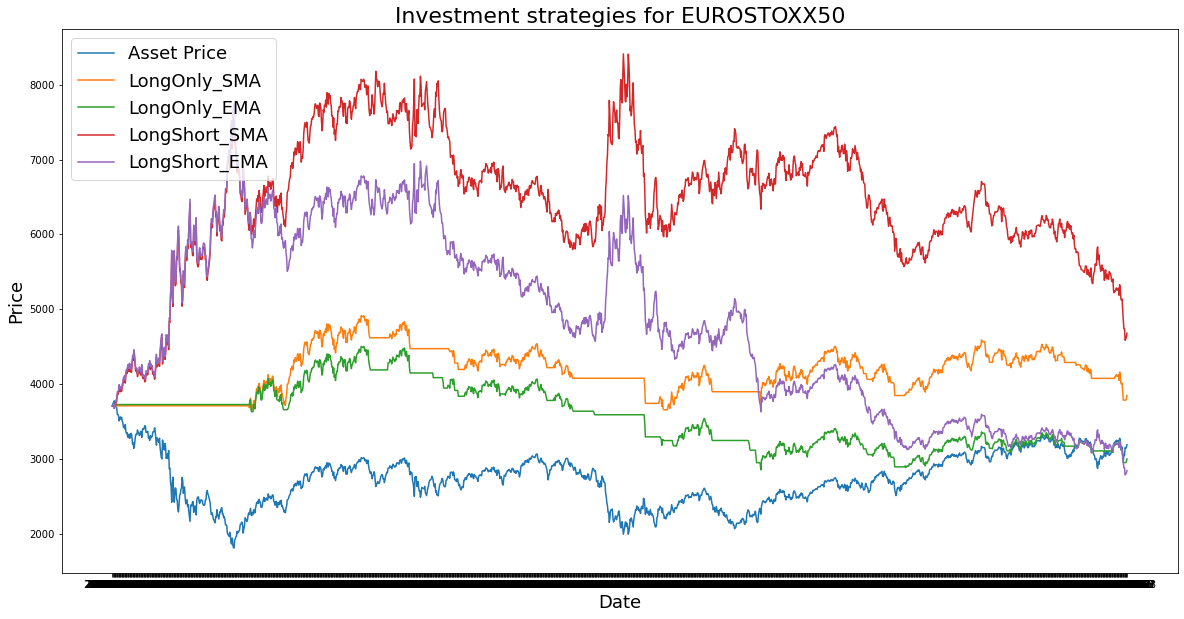

,Annualized Return,Annualized Vol,Historical VaR (5%),Historical CVaR (5%),Sharpe Ratio,Max Drawdown
Asset Price,-0.022590,0.261615,0.025934,0.038612,-0.086349,-0.520897
LongOnly_SMA,0.005547,0.137955,0.014558,0.022326,0.040211,-0.255762
LongOnly_EMA,-0.031743,0.136572,0.014789,0.022557,-0.232427,-0.366381
LongShort_SMA,0.035850,0.261013,0.025638,0.037340,0.137352,-0.454745
LongShort_EMA,-0.039553,0.260980,0.026051,0.037408,-0.151557,-0.639991


In [ ]:
asset = mapping_indexes[input_asset]
days = input_days_ma
 
SMA = input_strategies[0]
EMA = input_strategies[1]
MACD = input_strategies[2]

ema1 = 0
ema2 = 0
if MACD == 1:
    ema1 = input_days_macd[0]
    ema2 = input_days_macd[1]

longonly = input_sides[0]
longshort = input_sides[1]

df, df_pos, df_strat_price, df_strategy_returns, df_stats = strategy_main(asset, days, ema1, ema2, SMA=SMA, EMA=EMA, MACD=MACD, LongOnly=longonly, LongShort=longshort)
plot_strategy(asset.upper(), df_strat_price)
df_stats